In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\EL-HARES\.cache\kagglehub\datasets\muratkokludataset\rice-image-dataset\versions\1


In [13]:
# import requirement libraries and tools
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Set the path to the dataset
dataset_path = 'Rice_Image_Dataset'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
  
  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
    
        # Store the label for the image in the labels list
        labels.append(subfolder)
 
 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

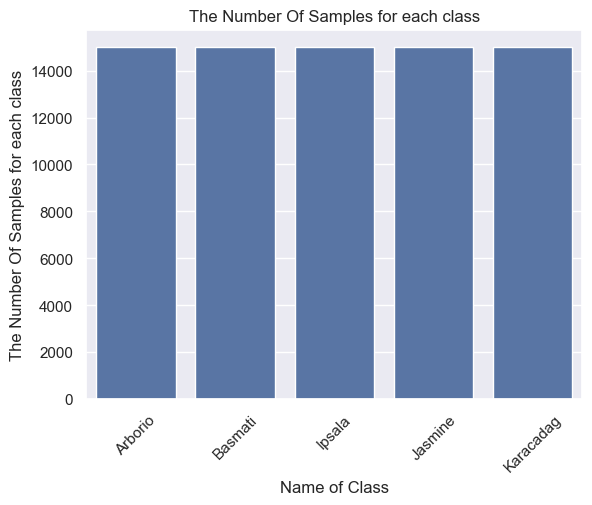

In [15]:
# plot the classes
ax = sns.countplot(x=df.label)

# Set labels and titles
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")
ax.set_title("The Number Of Samples for each class")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

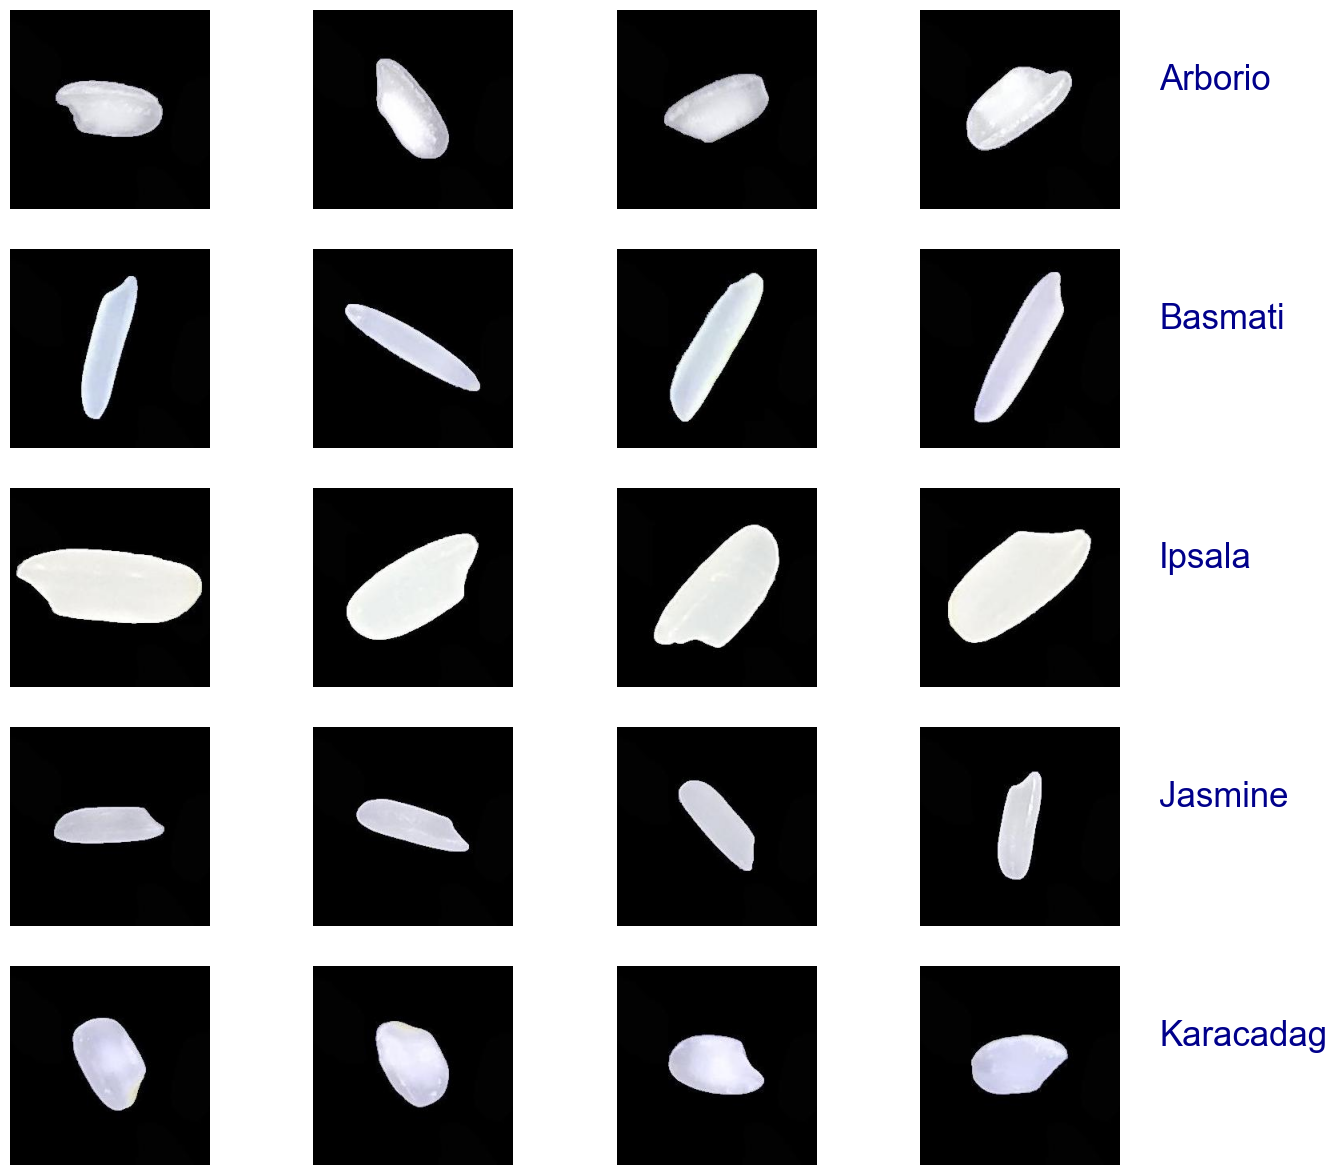

In [16]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]
    
    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')
    
    # Add a label to the bottom of the subplot grid
    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
print("Done")

Done


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (50, 50, 3)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
print("Done")

Done


In [21]:
# Compile the model
model.compile(loss='categorical_crossentropy'
              , optimizer='adam'
              , metrics=['accuracy', 'precision', 'recall', 'f1_score'])

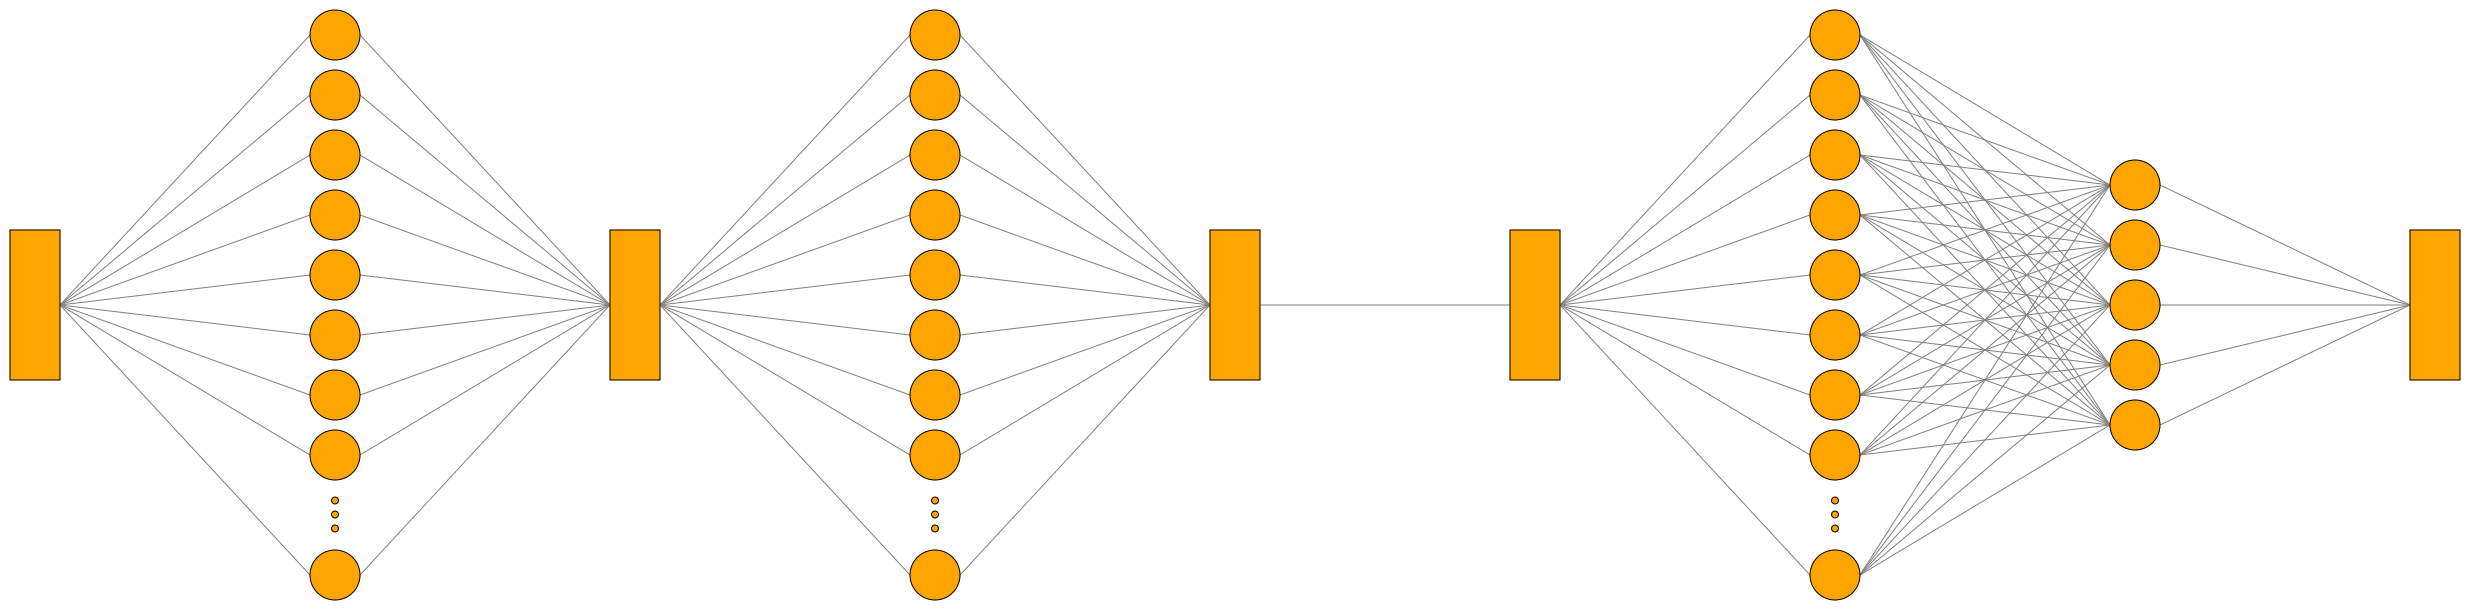

In [22]:
import visualkeras


visualkeras.graph_view(model).show() 
visualkeras.graph_view(model, to_file='model_graph.png')

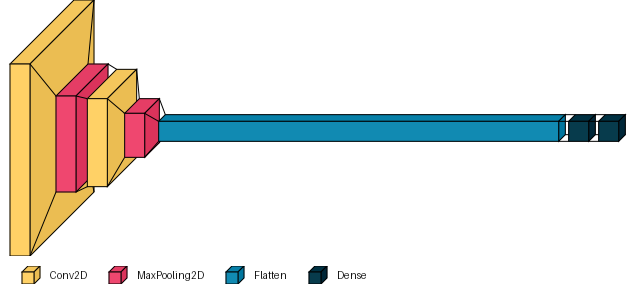

In [23]:
visualkeras.layered_view(model).show() 
visualkeras.layered_view(model, legend=True, to_file='model_with_labels.png') 

In [24]:
# Train the model on the training data
history = model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 310s 164ms/step - accuracy: 0.7764 - f1_score: 0.7731 - loss: 0.5470 - precision: 0.8637 - recall: 0.6982 - val_accuracy: 0.8983 - val_f1_score: 0.8980 - val_loss: 0.2715 - val_precision: 0.9015 - val_recall: 0.8956
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 170s 90ms/step - accuracy: 0.9358 - f1_score: 0.9359 - loss: 0.1756 - precision: 0.9386 - recall: 0.9327 - val_accuracy: 0.9599 - val_f1_score: 0.9599 - val_loss: 0.1154 - val_precision: 0.9618 - val_recall: 0.9581
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 176s 94ms/step - accuracy: 0.9561 - f1_score: 0.9561 - loss: 0.1214 - precision: 0.9575 - recall: 0.9544 - val_accuracy: 0.9445 - val_f1_score: 0.9441 - val_loss: 0.1492 - val_precision: 0.9468 - val_recall: 0.9431
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 177s 94ms/step - accuracy: 0.9648 - f1_score: 0.9647 - loss: 0.0982 - precision: 0.9660 - recall: 0.9635 - val_accuracy: 0.9774 - val_f1_score: 0.9774 - val_loss: 0.0621 - val_precision:

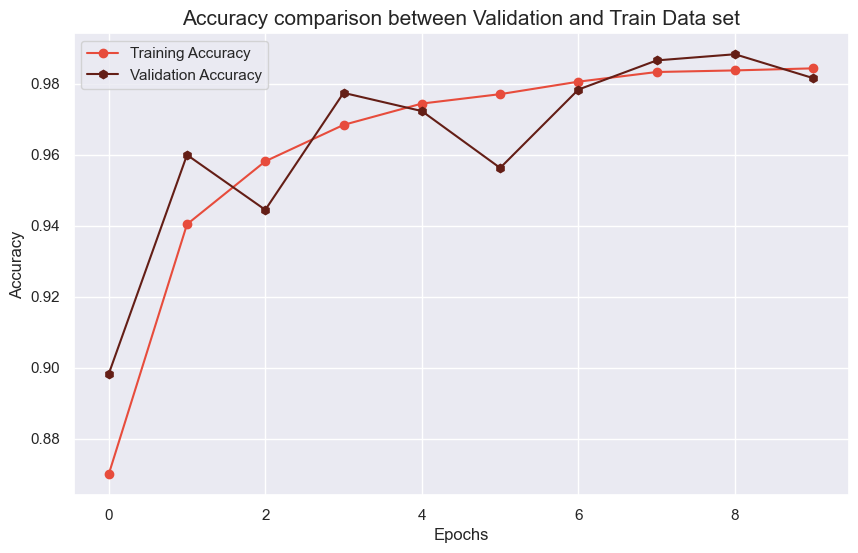

In [25]:
# Accuracy comparison between Validation and Train Data set
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], color="#E74C3C", marker='o', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='#641E16', marker='h', label='Validation Accuracy')
plt.title('Accuracy comparison between Validation and Train Data set', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.show()

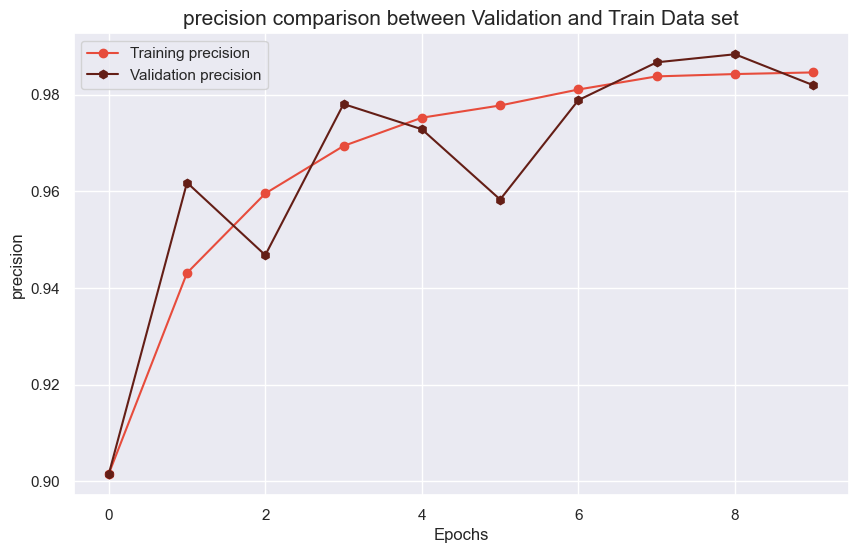

In [26]:
# precision comparison between Validation and Train Data set
plt.figure(figsize=(10, 6))
plt.plot(history.history['precision'], color="#E74C3C", marker='o', label='Training precision')
plt.plot(history.history['val_precision'], color='#641E16', marker='h', label='Validation precision')
plt.title('precision comparison between Validation and Train Data set', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('precision', fontsize=12)
plt.legend()
plt.show()

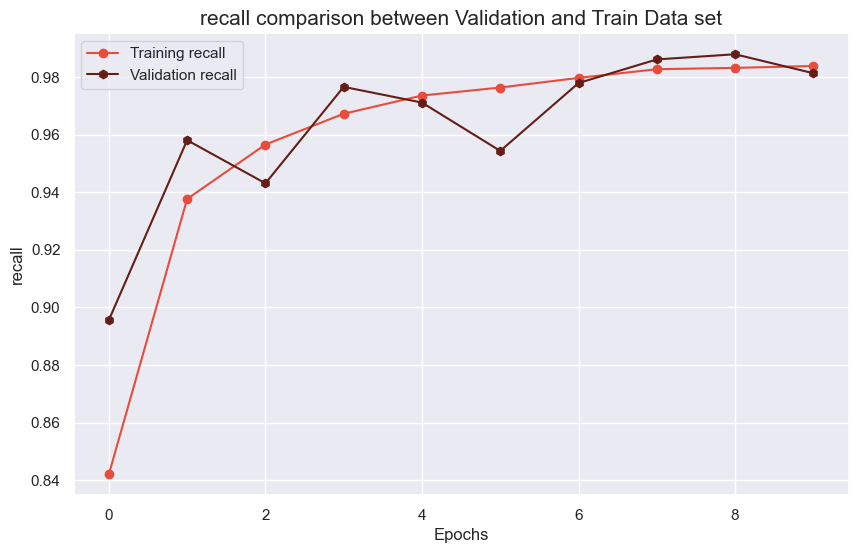

In [27]:
# recall comparison between Validation and Train Data set
plt.figure(figsize=(10, 6))
plt.plot(history.history['recall'], color="#E74C3C", marker='o', label='Training recall')
plt.plot(history.history['val_recall'], color='#641E16', marker='h', label='Validation recall')
plt.title('recall comparison between Validation and Train Data set', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('recall', fontsize=12)
plt.legend()
plt.show()

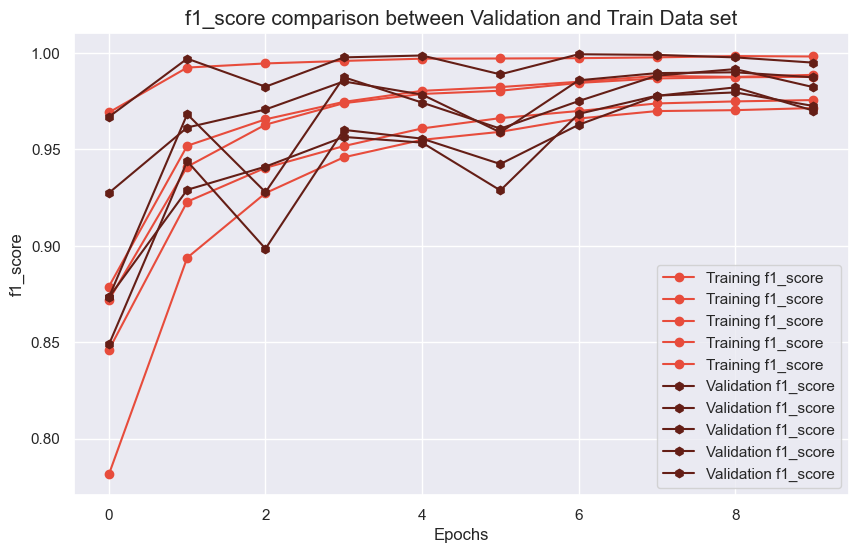

In [28]:
# f1_score comparison between Validation and Train Data set
plt.figure(figsize=(10, 6))
plt.plot(history.history['f1_score'], color="#E74C3C", marker='o', label='Training f1_score')
plt.plot(history.history['val_f1_score'], color='#641E16', marker='h', label='Validation f1_score')
plt.title('f1_score comparison between Validation and Train Data set', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('f1_score', fontsize=12)
plt.legend()
plt.show()

469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


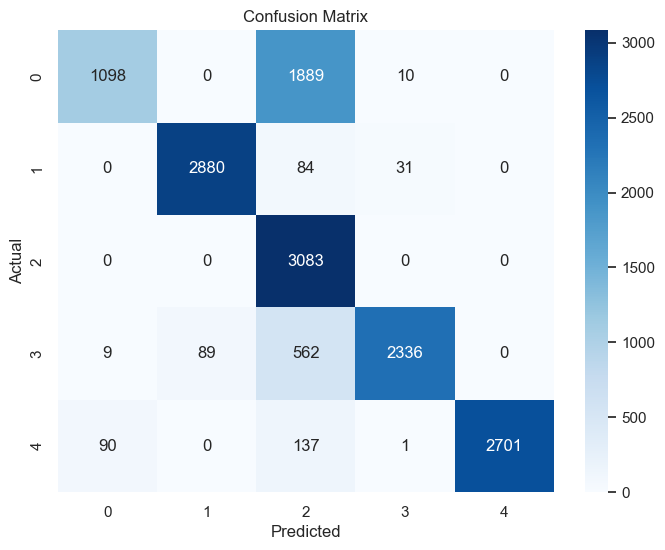

In [29]:
from sklearn.metrics import confusion_matrix

# Preprocess the test images
test_images = np.array([plt.imread(img_path) for img_path in X_test])
test_images = tf.image.resize(test_images, (50, 50)) / 255.0

# Get the true classes
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()